# Historical Method: Value at Risk (VaR) for a Stock Portfolio
**Author:** Winifred Mei  
**Date:** August 21, 2025  

This notebook demonstrates **Value at Risk (VaR)** calculation using the **historical simulation method**.  
We use Python with **yfinance** to fetch historical prices and compute VaR for a diversified stock portfolio.


## Define Time Period and Portfolio Stocks

We’ll analyze the **past 10 years** of data for a set of major tech stocks.


In [6]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

# Analysis period: last 10 years
years_back = 10
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=365*years_back)

# Portfolio tickers (tech-focused)
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']


## Downloading Adjusted Close Prices

Next, we download the daily adjusted close prices for each ticker using **yfinance**.


In [7]:
price_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    price_data[ticker] = data['Close']

print(price_data.head())



/var/folders/fb/yy69flkj2yv4cyv2j0q3jyzw0000gn/T/ipykernel_4087/2063452536.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/fb/yy69flkj2yv4cyv2j0q3jyzw0000gn/T/ipykernel_4087/2063452536.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/fb/yy69flkj2yv4cyv2j0q3jyzw0000gn/T/ipykernel_4087/2063452536.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/fb/yy69flkj2yv4cyv2j0q3jyzw0000gn/T/ipykernel_4087/2063452536.py:4: FutureWarning: YF.download() has changed argument au

                 AAPL       MSFT      GOOGL       AMZN       TSLA
Date                                                             
2015-08-25  23.313032  35.322548  30.440937  23.318501  14.668667
2015-08-26  24.650150  37.277657  32.790344  25.038500  14.989333
2015-08-27  25.376013  38.316292  33.198891  25.918501  16.199333
2015-08-28  25.459160  38.342480  32.787861  25.900499  16.565332
2015-08-31  25.340050  37.984623  32.197899  25.644501  16.604000


## Calculating Daily Log Returns

Once we have the adjusted close prices, we calculate the **daily log returns** and drop any missing values.

In [8]:
log_returns = np.log(price_data / price_data.shift(1)).dropna()
print(log_returns.head())


                AAPL      MSFT     GOOGL      AMZN      TSLA
Date                                                        
2015-08-26  0.055770  0.053873  0.074346  0.071168  0.021625
2015-08-27  0.029021  0.027481  0.012382  0.034542  0.077631
2015-08-28  0.003271  0.000683 -0.012458 -0.000695  0.022342
2015-08-31 -0.004689 -0.009377 -0.018157 -0.009933  0.002332
2015-09-01 -0.045726 -0.039846 -0.028592 -0.032397 -0.042780


## Construct Equally Weighted Portfolio

Assume a portfolio value of **$500,000** distributed equally across the 5 stocks.

In [9]:
portfolio_value = 500_000
weights = np.array([1/len(tickers)]*len(tickers))

print(weights)


[0.2 0.2 0.2 0.2 0.2]


## Calculate Portfolio Daily Returns

Weighted sum of daily log returns gives the portfolio’s daily return.


In [10]:
portfolio_returns = (log_returns * weights).sum(axis=1)
print(portfolio_returns.head())


Date
2015-08-26    0.055356
2015-08-27    0.036212
2015-08-28    0.002629
2015-08-31   -0.007965
2015-09-01   -0.037868
dtype: float64


## Calculate Rolling X-Day Returns

Use a **60-day rolling window** to compute cumulative returns for risk assessment.


In [11]:
window_days = 60
rolling_returns = portfolio_returns.rolling(window=window_days).sum().dropna()
print(rolling_returns.head())


Date
2015-11-18    0.198510
2015-11-19    0.145968
2015-11-20    0.116534
2015-11-23    0.112276
2015-11-24    0.118680
dtype: float64


## Compute Historical VaR

Calculate **99% confidence Value at Risk** using the historical method.


In [12]:
confidence = 0.99
VaR = -np.percentile(rolling_returns, 100 - confidence*100) * portfolio_value
print(f"Portfolio VaR (99% confidence): ${VaR:,.2f}")


Portfolio VaR (99% confidence): $140,458.55


## Visualize Portfolio Returns and VaR

Plot the distribution of the rolling returns and indicate the VaR level.


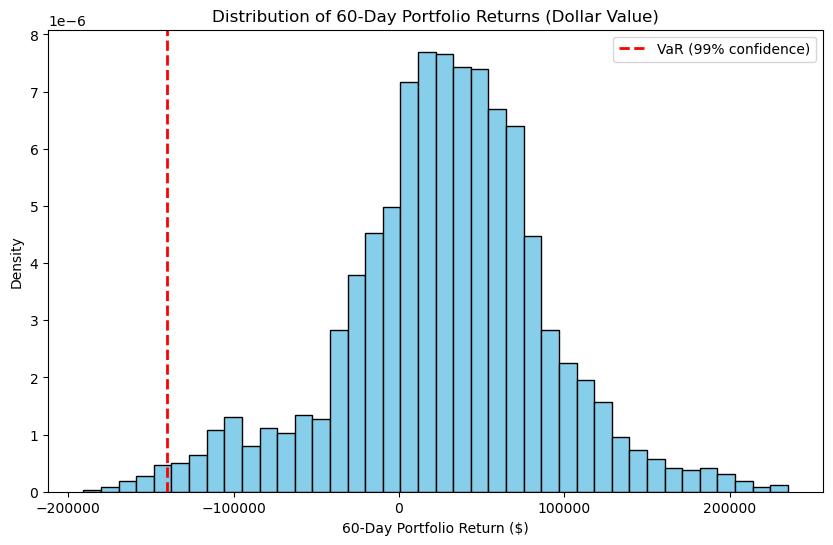

In [13]:
rolling_returns_dollar = rolling_returns * portfolio_value

plt.figure(figsize=(10,6))
plt.hist(rolling_returns_dollar, bins=40, color='skyblue', edgecolor='black', density=True)
plt.axvline(-VaR, color='red', linestyle='--', linewidth=2, label=f'VaR (99% confidence)')
plt.title('Distribution of 60-Day Portfolio Returns (Dollar Value)')
plt.xlabel('60-Day Portfolio Return ($)')
plt.ylabel('Density')
plt.legend()
plt.show()
